In [1]:
import datajoint as dj
from microns_phase3 import nda, utils


Connecting root@database:3306


/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
from PCA.CvPCA import CvPCA

In [4]:
def cvPCA(X):
    ''' X is 2 x stimuli x neurons '''
    pca = PCA(n_components=min(1024, X.shape[1])).fit(X[0].T)
    u = pca.components_.T
    sv = pca.singular_values_
    
    xproj = X[0].T @ (u / sv)
    cproj0 = X[0] @ xproj
    cproj1 = X[1] @ xproj
    ss = (cproj0 * cproj1).sum(axis=0)
    return ss

In [28]:
a = np.random.rand(2,100, 100)

In [30]:
ss = cvPCA(a)

In [33]:
ss / ss.sum()

array([3.64453263e-32, 2.45599241e-33, 4.86336428e-31, 6.75698692e-31,
       1.35211606e-30, 5.12422497e-31, 3.14922030e-30, 5.13936653e-33,
       1.74021102e-30, 1.87701889e-30, 7.21644732e-30, 5.62234309e-30,
       5.89779953e-32, 4.55624506e-30, 1.69777821e-31, 7.08380810e-31,
       2.50418350e-30, 1.22123171e-31, 1.18021177e-30, 1.83088859e-30,
       6.44306788e-30, 4.27838738e-31, 1.27084905e-31, 1.23855113e-30,
       9.01745217e-30, 3.28894962e-30, 8.44643785e-31, 4.09799959e-32,
       1.77640044e-29, 7.88196241e-31, 7.12250840e-32, 1.77462189e-29,
       7.39530909e-30, 1.24312255e-31, 4.04573345e-31, 1.74443873e-29,
       2.49441072e-30, 1.32160218e-32, 1.24972807e-31, 2.60198280e-30,
       4.46018650e-30, 5.69304140e-31, 1.13693265e-31, 3.27648364e-30,
       1.48974213e-30, 7.00310321e-32, 6.06135038e-30, 3.00153187e-30,
       1.39335609e-29, 6.13409065e-31, 3.68905205e-30, 4.50185066e-31,
       1.50910635e-29, 1.01987272e-30, 2.06987305e-29, 2.07339908e-30,
      

In [6]:
a.reshape((2,3,3))

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

In [79]:
cell_id = pd.read_pickle("data/clean_functional_neurons.pkl")

In [80]:
cell_id

,pt_root_id,session,scan_idx,unit_id,cortex_layer,brain_area
0,864691136136642173,4,7,665,L1,RL
1,864691136208993724,4,7,740,L1,V1
2,864691135683934135,4,7,782,L1,V1
3,864691135334528233,4,7,855,L1,V1
4,864691136309730650,4,7,921,L1,RL
...,...,...,...,...,...,...
8852,864691135502196829,9,4,7556,L2/3,V1
8853,864691135569353862,7,3,1827,L2/3,V1
8854,864691135925955086,5,6,2592,L2/3,V1
8855,864691135082076407,8,5,1859,L2/3,V1


In [4]:
trace = ActivityExtractor.extract_session_and_scan(6, 4)

In [5]:
trace_1, trace_2 = trace[:8826//2, :], trace[8826//2:, :]

In [7]:
cv = CvPCA()

In [8]:
cv.fit(trace_1)

In [ ]:
plt.plot(cv.explained_variance_)

In [ ]:
(nda.Oracle & {'session':5, 'scan_idx':7}).fetch('session', 'unit_id')

(array([5, 5, 5, ..., 5, 5, 5]),)
(array([   2,    3,    4, ..., 8860, 8861, 8862]),)


In [ ]:
np.stack(trace)

(8395, 40000)

In [ ]:
nda.ScanUnit.fetch('ms_delay', order_by='ms_delay ')

array([  0,   0,   0, ..., 154, 154, 154])

In [ ]:
nda.Oracle.fetch('pearson', order_by='pearson DESC')

array([ 0.839112,  0.807946,  0.794901, ..., -0.112907, -0.1195  ,
       -0.135572])

In [ ]:
(nda.ScanTimes & {'session':8, 'scan_idx':7}).fetch1('frame_times')

array([0.00000000e+00, 1.58362311e-01, 3.17028583e-01, ...,
       6.35102331e+03, 6.35118244e+03, 6.35134122e+03])

In [5]:
unit_key = {'session':5, 'scan_idx':7, 'unit_id':10}

In [6]:
fps = (nda.Scan & unit_key).fetch1('fps') # get frame rate of scan


In [7]:

oracle_rel = (dj.U('condition_hash').aggr(nda.Trial & unit_key,n='count(*)',m='min(trial_idx)') & 'n=10') # get oracle clips
oracle_hashes = oracle_rel.fetch('KEY',order_by='m ASC')

In [18]:
trial_1 = (nda.Trial & {'session':5, 'scan_idx':7, 'condition_hash':oracle_hashes[0]['condition_hash']}) * (nda.Activity & {'unit_id':10})

In [25]:
np.stack(trial_1.fetch('trace'))

(10, 40000)

In [27]:
act = (nda.Trial & {'session':5, 'scan_idx':7, 'condition_hash':oracle_hashes[0]['condition_hash']}) * (nda.Activity)

In [33]:
arr  = (act & 'start_idx=3554').fetch('trace')

In [36]:
act_arr_ = np.stack(arr)

In [1]:
act_arr_.std(axis=0)

NameError: name 'act_arr_' is not defined

In [67]:
(nda.Trial & unit_key)#.aggr('condition_hash', n='count(*)')

session Session ID,scan_idx Scan ID,trial_idx index of trial within stimulus,type type of stimulus trial,start_idx index of field 1 scan frame at start of trial,end_idx index of field 1 scan frame at end of trial,start_frame_time start time of stimulus frame relative to scan start (seconds),end_frame_time end time of stimulus frame relative to scan start (seconds),stim_times full vector of stimulus frame times relative to scan start (seconds),condition_hash 120-bit hash (The first 20 chars of MD5 in base64)
5,7,0,stimulus.Clip,1273,1335,202.05525159835815,212.0217468738556,=BLOB=,5mN+CgYzRIj4/bP+VH8Y
5,7,1,stimulus.Clip,1336,1399,212.1217496395111,222.08825016021729,=BLOB=,ImuSRQUQ9N4iUC010zUk
5,7,2,stimulus.Clip,1400,1462,222.18824863433838,232.15474915504456,=BLOB=,A3SF4sP0ffZXbfnyUGw0
5,7,3,stimulus.Clip,1463,1525,232.25474762916565,242.22124218940735,=BLOB=,FYcu7JS6q8kG7S//hXzq
5,7,4,stimulus.Clip,1526,1589,242.32123589515686,252.28775191307068,=BLOB=,qiBBaBtFVdb9F/zD+y1O
5,7,5,stimulus.Clip,1590,1652,252.3877477645874,262.35425090789795,=BLOB=,mR9hqOW1IBAzD5SOAu17
5,7,6,stimulus.Clip,1653,1716,262.4542467594147,272.4207499027252,=BLOB=,QmynNYnz4Q0hMBpTZ/xv
5,7,7,stimulus.Clip,1717,1779,272.5207486152649,282.4872510433197,=BLOB=,gpu0WyfdPMgXV/xhy6ZP
5,7,8,stimulus.Clip,1780,1842,282.5872497558594,292.55375123023987,=BLOB=,0ir9/br3yxbe2BBf65zF
5,7,9,stimulus.Clip,1843,1906,292.65374875068665,302.62024092674255,=BLOB=,NM2SnnQwIoj8iKOMP6xA


In [26]:
dj.U('condition_hash').aggr(nda.Trial & unit_key,n='count(*)',m='min(trial_idx)') & 'n>=2'

condition_hash 120-bit hash (The first 20 chars of MD5 in base64),n calculated attribute,m calculated attribute
+4gByvU9LfvSD0JHP6Ae,2,120
+rgSVBVRE8Ij1WNhq8ZW,2,50
/d03nh8d+f5CQoP4oXHK,2,62
0eP/PPhAGmbJ2peZOa/E,2,181
0gijdp4ppt4Dz70n4yW3,2,48
0ir9/br3yxbe2BBf65zF,2,8
0JcYLY6eaQxNgD0AqyHf,2,27
18PTv0aCUhaUeL2r9kDd,2,41
3wXTReOQa7mnr6Oz8aUf,2,180
4tIOoaR5VNXdEFB3JLsd,2,200


In [63]:
dj.U('condition_hash').aggr(nda.Trial & unit_key,n='count(*)',m='min(trial_idx)') & 'n=10'

condition_hash 120-bit hash (The first 20 chars of MD5 in base64),n calculated attribute,m calculated attribute
5zQTb77qI+ig8rigx1XU,10,33
7UETOWO5Z8aWuHDBJ2GG,10,36
ecUQJtcERZJGdqza1k7h,10,35
GjCMo2GkJp6y5vricadg,10,34
KXdTNAGMo1gCWz2Ge8zr,10,32
Oup5uAZxF2G7zEJkT+ui,10,37


In [38]:
trial_list = (nda.Trial & oracle_hashes[0] & unit_key).fetch('trial_idx')
first_clip = trial_list[2]
trial_block_rel = (nda.Trial & unit_key & f'trial_idx >= {first_clip} and trial_idx < {first_clip+6}')
trial_block_rel.fetch('start_idx', order_by='condition_hash DESC')

array([8355, 8038, 8164, 8228, 8291, 8101])

In [39]:
frame_times_set = []
# iterate over oracle repeats (10 repeats)
for first_clip in (nda.Trial & oracle_hashes[0] & unit_key).fetch('trial_idx'): 
    trial_block_rel = (nda.Trial & unit_key & f'trial_idx >= {first_clip} and trial_idx < {first_clip+6}') # uses the trial_idx of the first clip to grab subsequent 5 clips (trial_block) 
    start_times, end_times = trial_block_rel.fetch('start_frame_time', 'end_frame_time', order_by='condition_hash DESC') # grabs start time and end time of each clip in trial_block and orders by condition_hash to maintain order across scans
    frame_times = [np.linspace(s, e , np.round(fps * (e - s)).astype(int)) for s, e in zip(start_times, end_times)] # generate time vector between start and end times according to frame rate of scan
    frame_times_set.append(frame_times)



In [40]:
frame_times = [np.linspace(s, e , np.round(fps *3* (e - s)).astype(int)) for s, e in zip(start_times, end_times)] # generate time vector between start and end times according to frame rate of scan


In [41]:
trace, fts, delay = ((nda.Activity & unit_key) * nda.ScanTimes * nda.ScanUnit).fetch1('trace', 'frame_times', 'ms_delay') # fetch trace delay and frame times for interpolation


In [42]:
from scipy.interpolate import interp1d

In [43]:
f2a = interp1d(fts + delay/1000, trace)

In [44]:
oracle_traces = np.array([f2a(ft) for ft in frame_times_set])

In [45]:
oracle_traces -= np.min(oracle_traces,axis=(1,2),keepdims=True) # normalize the oracle traces
oracle_traces /= np.max(oracle_traces,axis=(1,2),keepdims=True)

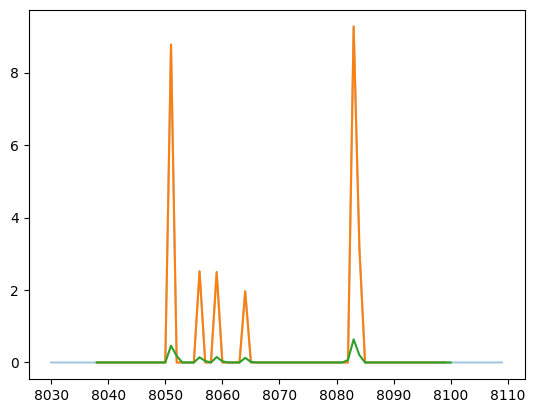

In [46]:
plt.plot(np.arange(8030,8110), trace[8030:8110], alpha=0.4);
plt.plot(np.arange(8038,8100),trace[8038:8100], alpha=1);
plt.plot(np.arange(8038,8101),oracle_traces[2, 1, :], alpha=1)

In [28]:
cv = CvPCA()

In [31]:
cv.fit(oracle_traces[:,0,:].T)

CvPCA()

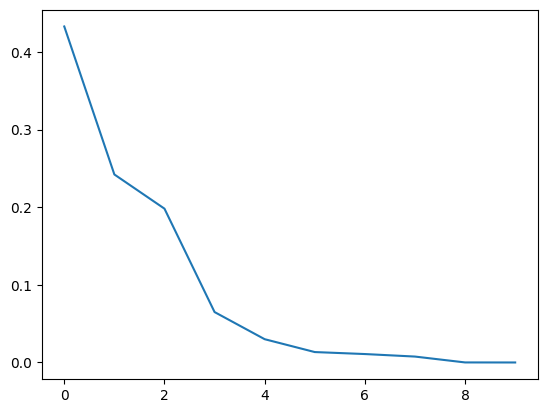

In [32]:
plt.plot(cv.explained_variance_ratio_);

In [20]:
sing_values = cv.fit_cv(oracle_traces[:,0,:].T, oracle_traces[:,1,:].T)

In [23]:
np.diag(sing_values)

array([ 9.22419603e-04,  8.36473767e-04,  6.74412537e-08,  2.44447634e-03,
        4.71080706e-04,  4.62549823e-05,  5.68748625e-04, -1.16774165e-05,
        1.20143822e-10, -3.75882872e-03])

In [86]:
nda.Scan.fetch('KEY')

[{'session': 4, 'scan_idx': 7},
 {'session': 4, 'scan_idx': 9},
 {'session': 4, 'scan_idx': 10},
 {'session': 5, 'scan_idx': 3},
 {'session': 5, 'scan_idx': 6},
 {'session': 5, 'scan_idx': 7},
 {'session': 6, 'scan_idx': 2},
 {'session': 6, 'scan_idx': 4},
 {'session': 6, 'scan_idx': 6},
 {'session': 6, 'scan_idx': 7},
 {'session': 7, 'scan_idx': 3},
 {'session': 7, 'scan_idx': 4},
 {'session': 7, 'scan_idx': 5},
 {'session': 8, 'scan_idx': 5},
 {'session': 8, 'scan_idx': 7},
 {'session': 8, 'scan_idx': 9},
 {'session': 9, 'scan_idx': 3},
 {'session': 9, 'scan_idx': 4},
 {'session': 9, 'scan_idx': 6}]

In [ ]:
oracle_traces[:,0,:].shape

(10, 63)

In [ ]:
np.where(oracle_traces[:,1,:] >= np.median(oracle_traces[:,1,:]))

ValueError: either both or neither of x and y should be given

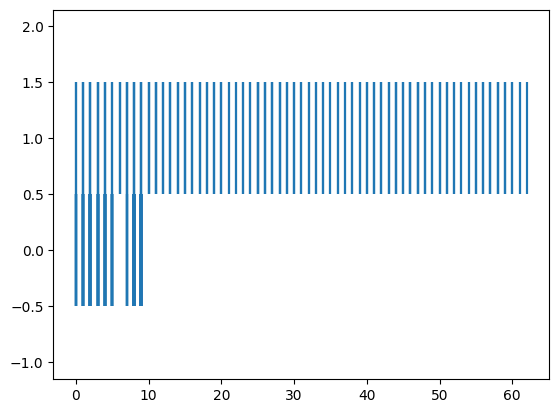

In [ ]:
plt.eventplot(np.where(oracle_traces[:,1,:] >= np.median(oracle_traces[:,1,:])));

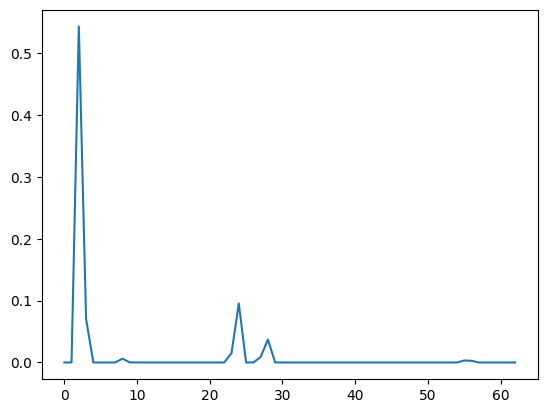

In [ ]:
plt.plot(oracle_traces[0, 1, :].T);

In [ ]:
import os
from tqdm.auto import tqdm

In [ ]:
pair = (8,5)
trials_clips = (nda.Trial*nda.Clip)
os.makedirs(f'{pair[0]}_{pair[1]}_trials')

In [ ]:
subset = (trials_clips & {'session':pair[0], 'scan_idx':pair[1]})
trial_idxs = subset.fetch('trial_idx')
sorted_trials = sorted(trial_idxs)

In [ ]:
#Loading activity data
#Generating list of dictionary with keys for all our cells so that we can subset nda.Activity
act_keys = []
pairs = [(4, 7), (5, 3), (5, 6),(5, 7),(6, 2),(6, 4),(6, 6),(6, 7),(7, 3),(7, 4),(7,5),(8,5)]

for ses, sid, uid in zip(cell_id['session'], cell_id['scan_idx'], cell_id['unit_id']):
    if (ses, sid) in pairs:
        act_keys.append({'session':ses, 'scan_idx':sid,'unit_id':uid})

#Subset nda.Activity
red_activity = nda.Activity&act_keys

#Load it as a DataFrame
activity_df = red_activity.fetch(format = 'frame')
activity_df = activity_df.reset_index()

In [ ]:
activity_list = (activity_df['trace']).to_list()
# activity_list = [act[:40000] for act in activity_list]

In [ ]:
{act.size for act in activity_list}

{40000}

In [ ]:
activity_arr = np.stack(activity_list, axis=0)

In [ ]:
corr = np.corrcoef(activity_arr[:5000,:])

In [ ]:
activity_arr[:50,:].shape

(50, 40000)

In [ ]:
sns.heatmap(corr);
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False)

: 

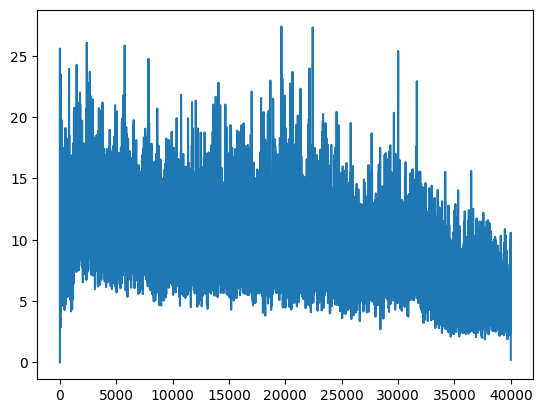

In [ ]:
plt.plot(activity_arr.std(axis=0));

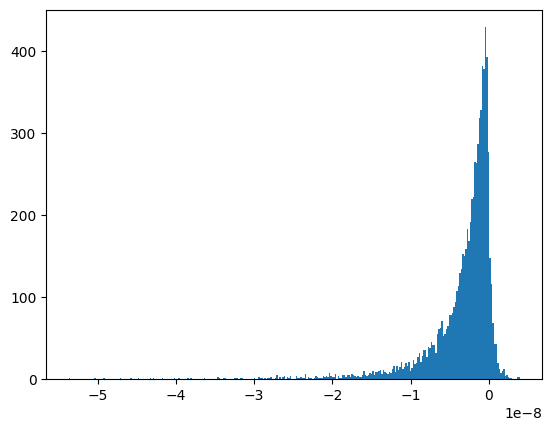

In [ ]:
plt.hist(activity_arr.min(axis=1), bins=300);

In [ ]:
treadmill_df = (nda.Treadmill & act_keys).fetch(format='frame')
treadmill_df = treadmill_df.reset_index()

In [ ]:
treadmill_arr = np.stack(treadmill_df['treadmill_velocity'].to_list(), axis=0)

In [ ]:
(treadmill_arr).shape

(12, 40000)

In [ ]:
pupil_df = (nda.ManualPupil & act_keys).fetch(format='frame')
pupil_df = pupil_df.reset_index()

In [ ]:
pupil_df

,session,scan_idx,pupil_min_r,pupil_maj_r,pupil_x,pupil_y
0,4,7,"[nan, nan, nan, nan, nan, nan, nan, nan, 74.14...","[nan, nan, nan, nan, nan, nan, nan, nan, 86.76...","[nan, nan, nan, nan, nan, nan, nan, nan, 1346....","[nan, nan, nan, nan, nan, nan, nan, nan, 814.8..."
1,5,3,"[nan, nan, nan, nan, nan, nan, nan, nan, 56.05...","[nan, nan, nan, nan, nan, nan, nan, nan, 74.23...","[nan, nan, nan, nan, nan, nan, nan, nan, 1348....","[nan, nan, nan, nan, nan, nan, nan, nan, 750.0..."
2,5,6,"[nan, nan, nan, nan, nan, nan, nan, nan, 40.66...","[nan, nan, nan, nan, nan, nan, nan, nan, 82.24...","[nan, nan, nan, nan, nan, nan, nan, nan, 1353....","[nan, nan, nan, nan, nan, nan, nan, nan, 755.5..."
3,5,7,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,6,2,"[nan, nan, nan, nan, nan, nan, nan, nan, 27.90...","[nan, nan, nan, nan, nan, nan, nan, nan, 61.61...","[nan, nan, nan, nan, nan, nan, nan, nan, 1349....","[nan, nan, nan, nan, nan, nan, nan, nan, 763.7..."
5,6,4,"[nan, nan, nan, nan, nan, nan, nan, nan, 78.67...","[nan, nan, nan, nan, nan, nan, nan, nan, 85.99...","[nan, nan, nan, nan, nan, nan, nan, nan, 1359....","[nan, nan, nan, nan, nan, nan, nan, nan, 743.5..."
6,6,6,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
7,6,7,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
8,7,3,"[nan, nan, nan, nan, nan, nan, nan, 39.3340072...","[nan, nan, nan, nan, nan, nan, nan, 57.7080620...","[nan, nan, nan, nan, nan, nan, nan, 1070.90987...","[nan, nan, nan, nan, nan, nan, nan, 584.776968..."
9,7,4,"[nan, nan, nan, nan, nan, nan, nan, nan, 89.15...","[nan, nan, nan, nan, nan, nan, nan, nan, 96.88...","[nan, nan, nan, nan, nan, nan, nan, nan, 1064....","[nan, nan, nan, nan, nan, nan, nan, nan, 575.1..."


In [ ]:
pupil_arr_maj = np.stack(pupil_df['pupil_maj_r'].to_list(), axis=0)
pupil_arr_min = np.stack(pupil_df['pupil_min_r'].to_list(), axis=0)

In [ ]:
np.isnan(pupil_arr_maj).sum(axis=1) / pupil_arr_maj.shape[1]

array([0.303225, 0.747   , 0.02655 , 0.100025, 0.024875, 0.03295 ,
       0.0409  , 0.138575, 0.046725, 0.009675, 0.017025, 0.015   ])

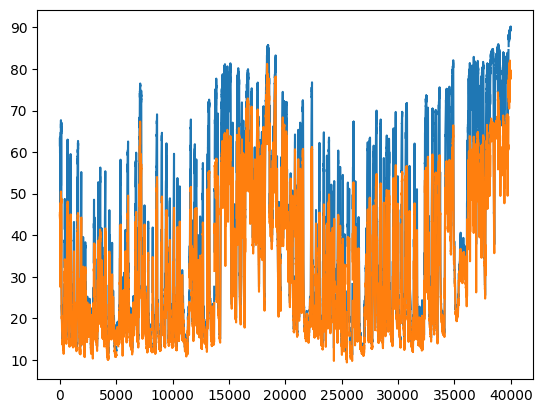

In [ ]:
idx = 4
plt.plot(pupil_arr_maj[idx,:]);
# plt.plot(pupil_arr_min[idx,:]);
plt.plot((pupil_arr_min[idx,:] + pupil_arr_maj[idx,:])/2);